In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
import os

In [2]:
os.chdir('D:\Github\google NCAA\Results')

In [3]:
tourney_result = pd.read_csv("D:\Datasets\Google_NCAA\MNCAATourneyCompactResults.csv")

In [4]:
tourney_seed = pd.read_csv("D:\Datasets\Google_NCAA\MNCAATourneySeeds.csv")

In [5]:
tourney_result

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0
...,...,...,...,...,...,...,...,...
2246,2019,146,1120,77,1246,71,N,1
2247,2019,146,1277,68,1181,67,N,0
2248,2019,152,1403,61,1277,51,N,0
2249,2019,152,1438,63,1120,62,N,0


In [6]:
tourney_result = tourney_result.drop(['DayNum', 'WScore', 'LScore', 'WLoc', 'NumOT'], axis=1)

In [7]:
tourney_seed

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374
...,...,...,...
2281,2019,Z12,1332
2282,2019,Z13,1414
2283,2019,Z14,1330
2284,2019,Z15,1159


In [8]:
tourney_result = pd.merge(tourney_result, tourney_seed, left_on=['Season', 'WTeamID'], 
                          right_on=['Season', 'TeamID'], 
                          how='left')

In [9]:
tourney_result

,Season,WTeamID,LTeamID,Seed,TeamID
0,1985,1116,1234,X09,1116
1,1985,1120,1345,Z11,1120
2,1985,1207,1250,W01,1207
3,1985,1229,1425,Y09,1229
4,1985,1242,1325,Z03,1242
...,...,...,...,...,...
2246,2019,1120,1246,Y05,1120
2247,2019,1277,1181,W02,1277
2248,2019,1403,1277,X03,1403
2249,2019,1438,1120,Z01,1438


In [10]:
tourney_result.rename(columns={'Seed':'WSeed'}, inplace=True)

In [11]:
tourney_result = tourney_result.drop('TeamID', axis=1)

In [12]:
tourney_result

,Season,WTeamID,LTeamID,WSeed
0,1985,1116,1234,X09
1,1985,1120,1345,Z11
2,1985,1207,1250,W01
3,1985,1229,1425,Y09
4,1985,1242,1325,Z03
...,...,...,...,...
2246,2019,1120,1246,Y05
2247,2019,1277,1181,W02
2248,2019,1403,1277,X03
2249,2019,1438,1120,Z01


In [13]:
tourney_result = pd.merge(tourney_result, tourney_seed, left_on=['Season', 'LTeamID'], 
                          right_on=['Season', 'TeamID'], 
                          how='left')
tourney_result.rename(columns={'Seed':'LSeed'}, inplace=True)
tourney_result = tourney_result.drop('TeamID', axis=1)

In [14]:
tourney_result

,Season,WTeamID,LTeamID,WSeed,LSeed
0,1985,1116,1234,X09,X08
1,1985,1120,1345,Z11,Z06
2,1985,1207,1250,W01,W16
3,1985,1229,1425,Y09,Y08
4,1985,1242,1325,Z03,Z14
...,...,...,...,...,...
2246,2019,1120,1246,Y05,Y02
2247,2019,1277,1181,W02,W01
2248,2019,1403,1277,X03,W02
2249,2019,1438,1120,Z01,Y05


In [15]:
def get_seed(x):
    return int(x[1:3])

tourney_result['WSeed'] = tourney_result['WSeed'].map(lambda x: get_seed(x))
tourney_result['LSeed'] = tourney_result['LSeed'].map(lambda x: get_seed(x))
tourney_result

,Season,WTeamID,LTeamID,WSeed,LSeed
0,1985,1116,1234,9,8
1,1985,1120,1345,11,6
2,1985,1207,1250,1,16
3,1985,1229,1425,9,8
4,1985,1242,1325,3,14
...,...,...,...,...,...
2246,2019,1120,1246,5,2
2247,2019,1277,1181,2,1
2248,2019,1403,1277,3,2
2249,2019,1438,1120,1,5


In [16]:
season_result = pd.read_csv("D:\Datasets\Google_NCAA\MRegularSeasonCompactResults.csv")

In [17]:
season_result

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0
...,...,...,...,...,...,...,...,...
161547,2019,132,1153,69,1222,57,N,0
161548,2019,132,1209,73,1426,64,N,0
161549,2019,132,1277,65,1276,60,N,0
161550,2019,132,1387,55,1382,53,N,0


In [18]:
season_win_result = season_result[['Season', 'WTeamID', 'WScore']]
season_win_result

,Season,WTeamID,WScore
0,1985,1228,81
1,1985,1106,77
2,1985,1112,63
3,1985,1165,70
4,1985,1192,86
...,...,...,...
161547,2019,1153,69
161548,2019,1209,73
161549,2019,1277,65
161550,2019,1387,55


In [19]:
season_lose_result = season_result[['Season', 'LTeamID', 'LScore']]
season_lose_result

,Season,LTeamID,LScore
0,1985,1328,64
1,1985,1354,70
2,1985,1223,56
3,1985,1432,54
4,1985,1447,74
...,...,...,...
161547,2019,1222,57
161548,2019,1426,64
161549,2019,1276,60
161550,2019,1382,53


In [20]:
season_win_result.rename(columns={'WTeamID':'TeamID', 'WScore':'Score'}, inplace=True)
season_lose_result.rename(columns={'LTeamID':'TeamID', 'LScore':'Score'}, inplace=True)
season_result = pd.concat((season_win_result, season_lose_result)).reset_index(drop=True)
season_result

C:\Users\ajink\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Season,TeamID,Score
0,1985,1228,81
1,1985,1106,77
2,1985,1112,63
3,1985,1165,70
4,1985,1192,86
...,...,...,...
323099,2019,1222,57
323100,2019,1426,64
323101,2019,1276,60
323102,2019,1382,53


In [21]:
season_score = season_result.groupby(['Season', 'TeamID'])['Score'].sum().reset_index()
season_score

,Season,TeamID,Score
0,1985,1102,1514
1,1985,1103,1404
2,1985,1104,2055
3,1985,1106,1719
4,1985,1108,2075
...,...,...,...
11236,2019,1462,2372
11237,2019,1463,2265
11238,2019,1464,2205
11239,2019,1465,1962


In [22]:
tourney_result = pd.merge(tourney_result, season_score, left_on=['Season', 'WTeamID'], 
                          right_on=['Season', 'TeamID'], 
                          how='left')

In [23]:
tourney_result

,Season,WTeamID,LTeamID,WSeed,LSeed,TeamID,Score
0,1985,1116,1234,9,8,1116,2156
1,1985,1120,1345,11,6,1120,2040
2,1985,1207,1250,1,16,1207,2045
3,1985,1229,1425,9,8,1229,1933
4,1985,1242,1325,3,14,1242,2281
...,...,...,...,...,...,...,...
2246,2019,1120,1246,5,2,1120,2682
2247,2019,1277,1181,2,1,1277,2680
2248,2019,1403,1277,3,2,1403,2339
2249,2019,1438,1120,1,5,1438,2299


In [24]:
tourney_result.rename(columns={'Score':'WScoreT'}, inplace=True)

In [25]:
tourney_result = tourney_result.drop('TeamID', axis=1)

In [26]:
tourney_result = pd.merge(tourney_result, season_score, left_on=['Season', 'LTeamID'], 
                          right_on=['Season', 'TeamID'], 
                          how='left')

In [27]:
tourney_result

,Season,WTeamID,LTeamID,WSeed,LSeed,WScoreT,TeamID,Score
0,1985,1116,1234,9,8,2156,1234,2092
1,1985,1120,1345,11,6,2040,1345,1728
2,1985,1207,1250,1,16,2045,1250,1907
3,1985,1229,1425,9,8,1933,1425,1915
4,1985,1242,1325,3,14,2281,1325,1824
...,...,...,...,...,...,...,...,...
2246,2019,1120,1246,5,2,2682,1246,2532
2247,2019,1277,1181,2,1,2680,1181,2839
2248,2019,1403,1277,3,2,2339,1277,2680
2249,2019,1438,1120,1,5,2299,1120,2682


In [28]:
tourney_result.rename(columns={'Score':'LScoreT'}, inplace=True)
tourney_result = tourney_result.drop('TeamID', axis=1)
tourney_result

,Season,WTeamID,LTeamID,WSeed,LSeed,WScoreT,LScoreT
0,1985,1116,1234,9,8,2156,2092
1,1985,1120,1345,11,6,2040,1728
2,1985,1207,1250,1,16,2045,1907
3,1985,1229,1425,9,8,1933,1915
4,1985,1242,1325,3,14,2281,1824
...,...,...,...,...,...,...,...
2246,2019,1120,1246,5,2,2682,2532
2247,2019,1277,1181,2,1,2680,2839
2248,2019,1403,1277,3,2,2339,2680
2249,2019,1438,1120,1,5,2299,2682


In [29]:
tourney_win_result = tourney_result.drop(['Season', 'WTeamID', 'LTeamID'], axis=1)
tourney_win_result.rename(columns={'WSeed':'Seed1', 'LSeed':'Seed2', 'WScoreT':'ScoreT1', 'LScoreT':'ScoreT2'}, inplace=True)
tourney_win_result

,Seed1,Seed2,ScoreT1,ScoreT2
0,9,8,2156,2092
1,11,6,2040,1728
2,1,16,2045,1907
3,9,8,1933,1915
4,3,14,2281,1824
...,...,...,...,...
2246,5,2,2682,2532
2247,2,1,2680,2839
2248,3,2,2339,2680
2249,1,5,2299,2682


In [30]:
tourney_lose_result = tourney_win_result.copy()
tourney_lose_result['Seed1'] = tourney_win_result['Seed2']
tourney_lose_result['Seed2'] = tourney_win_result['Seed1']
tourney_lose_result['ScoreT1'] = tourney_win_result['ScoreT2']
tourney_lose_result['ScoreT2'] = tourney_win_result['ScoreT1']
tourney_lose_result

,Seed1,Seed2,ScoreT1,ScoreT2
0,8,9,2092,2156
1,6,11,1728,2040
2,16,1,1907,2045
3,8,9,1915,1933
4,14,3,1824,2281
...,...,...,...,...
2246,2,5,2532,2682
2247,1,2,2839,2680
2248,2,3,2680,2339
2249,5,1,2682,2299


In [31]:
tourney_win_result['Seed_diff'] = tourney_win_result['Seed1'] - tourney_win_result['Seed2']
tourney_win_result['ScoreT_diff'] = tourney_win_result['ScoreT1'] - tourney_win_result['ScoreT2']
tourney_lose_result['Seed_diff'] = tourney_lose_result['Seed1'] - tourney_lose_result['Seed2']
tourney_lose_result['ScoreT_diff'] = tourney_lose_result['ScoreT1'] - tourney_lose_result['ScoreT2']

In [32]:
tourney_win_result['result'] = 1
tourney_lose_result['result'] = 0
tourney_result = pd.concat((tourney_win_result, tourney_lose_result)).reset_index(drop=True)
tourney_result

,Seed1,Seed2,ScoreT1,ScoreT2,Seed_diff,ScoreT_diff,result
0,9,8,2156,2092,1,64,1
1,11,6,2040,1728,5,312,1
2,1,16,2045,1907,-15,138,1
3,9,8,1933,1915,1,18,1
4,3,14,2281,1824,-11,457,1
...,...,...,...,...,...,...,...
4497,2,5,2532,2682,-3,-150,0
4498,1,2,2839,2680,-1,159,0
4499,2,3,2680,2339,-1,341,0
4500,5,1,2682,2299,4,383,0


In [33]:
test_df = pd.read_csv("D:\Datasets\Google_NCAA\MSampleSubmissionStage1_2020.csv")

In [34]:
test_df

,ID,Pred
0,2015_1107_1112,0.5
1,2015_1107_1116,0.5
2,2015_1107_1124,0.5
3,2015_1107_1125,0.5
4,2015_1107_1129,0.5
...,...,...
11385,2019_1449_1459,0.5
11386,2019_1449_1463,0.5
11387,2019_1458_1459,0.5
11388,2019_1458_1463,0.5


In [35]:
test_df['Season'] = test_df['ID'].map(lambda x: int(x[:4]))
test_df['WTeamID'] = test_df['ID'].map(lambda x: int(x[5:9]))
test_df['LTeamID'] = test_df['ID'].map(lambda x: int(x[10:14]))
test_df

,ID,Pred,Season,WTeamID,LTeamID
0,2015_1107_1112,0.5,2015,1107,1112
1,2015_1107_1116,0.5,2015,1107,1116
2,2015_1107_1124,0.5,2015,1107,1124
3,2015_1107_1125,0.5,2015,1107,1125
4,2015_1107_1129,0.5,2015,1107,1129
...,...,...,...,...,...
11385,2019_1449_1459,0.5,2019,1449,1459
11386,2019_1449_1463,0.5,2019,1449,1463
11387,2019_1458_1459,0.5,2019,1458,1459
11388,2019_1458_1463,0.5,2019,1458,1463


In [36]:
test_df = pd.merge(test_df, tourney_seed, left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'], how='left')
test_df.rename(columns={'Seed':'Seed1'}, inplace=True)
test_df = test_df.drop('TeamID', axis=1)
test_df = pd.merge(test_df, tourney_seed, left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'], how='left')
test_df.rename(columns={'Seed':'Seed2'}, inplace=True)
test_df = test_df.drop('TeamID', axis=1)
test_df = pd.merge(test_df, season_score, left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'], how='left')
test_df.rename(columns={'Score':'ScoreT1'}, inplace=True)
test_df = test_df.drop('TeamID', axis=1)
test_df = pd.merge(test_df, season_score, left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'], how='left')
test_df.rename(columns={'Score':'ScoreT2'}, inplace=True)
test_df = test_df.drop('TeamID', axis=1)
test_df

,ID,Pred,Season,WTeamID,LTeamID,Seed1,Seed2,ScoreT1,ScoreT2
0,2015_1107_1112,0.5,2015,1107,1112,W14,Z02,2096,2599
1,2015_1107_1116,0.5,2015,1107,1116,W14,Z05,2096,2653
2,2015_1107_1124,0.5,2015,1107,1124,W14,Z03,2096,2212
3,2015_1107_1125,0.5,2015,1107,1125,W14,W15,2096,2287
4,2015_1107_1129,0.5,2015,1107,1129,W14,W11a,2096,2166
...,...,...,...,...,...,...,...,...,...
11385,2019_1449_1459,0.5,2019,1449,1459,Y09,Y07,2374,2436
11386,2019_1449_1463,0.5,2019,1449,1463,Y09,W14,2374,2265
11387,2019_1458_1459,0.5,2019,1458,1459,Z05,Y07,2279,2436
11388,2019_1458_1463,0.5,2019,1458,1463,Z05,W14,2279,2265


In [37]:
test_df['Seed1'] = test_df['Seed1'].map(lambda x: get_seed(x))
test_df['Seed2'] = test_df['Seed2'].map(lambda x: get_seed(x))
test_df['Seed_diff'] = test_df['Seed1'] - test_df['Seed2']
test_df['ScoreT_diff'] = test_df['ScoreT1'] - test_df['ScoreT2']
test_df = test_df.drop(['ID', 'Pred', 'Season', 'WTeamID', 'LTeamID'], axis=1)
test_df

,Seed1,Seed2,ScoreT1,ScoreT2,Seed_diff,ScoreT_diff
0,14,2,2096,2599,12,-503
1,14,5,2096,2653,9,-557
2,14,3,2096,2212,11,-116
3,14,15,2096,2287,-1,-191
4,14,11,2096,2166,3,-70
...,...,...,...,...,...,...
11385,9,7,2374,2436,2,-62
11386,9,14,2374,2265,-5,109
11387,5,7,2279,2436,-2,-157
11388,5,14,2279,2265,-9,14


In [38]:
X = tourney_result.drop('result', axis=1)
y = tourney_result.result

In [39]:
result_table = pd.DataFrame(columns=['num_leaves','min_data_in_leaf','objective','max_depth','learning_rate','boosting_type',
                                    'bagging_seed','metric','verbosity','random_state','min_child_weight',
                                    'feature_fraction','bagging_fraction','reg_alpha','reg_lambda','fold','log_loss',
                                    'overall_log_loss'])

In [40]:
from sklearn.model_selection import KFold
import lightgbm as lgb

params = {'num_leaves': 127,
          'min_data_in_leaf': 10,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.0001,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'logloss',
          "verbosity": -1,
          'random_state': 42,
         }

In [41]:
for i in range(10):
    result_table = result_table.append(params, ignore_index=True)

In [42]:
import gc
NFOLDS = 10
folds = KFold(n_splits=NFOLDS, shuffle=True, random_state=17)

In [43]:
columns = X.columns

In [44]:
splits = folds.split(X, y)

In [45]:
y_preds = np.zeros(test_df.shape[0])
y_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [46]:
y_oof = np.zeros(X.shape[0])
y_oof

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
y_valid_coll = np.zeros(X.shape[0])

In [48]:
feature_importances = pd.DataFrame()
feature_importances['feature'] = columns
feature_importances

,feature
0,Seed1
1,Seed2
2,ScoreT1
3,ScoreT2
4,Seed_diff
5,ScoreT_diff


In [49]:
for fold_n, (train_index, valid_index) in enumerate(splits):
    print('Fold:',fold_n+1)
    pd.options.mode.chained_assignment = None
    result_table['fold'].loc[fold_n] = fold_n+1
    
    X_train, X_valid = X[columns].iloc[train_index], X[columns].iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    y_valid_coll[valid_index] = y_valid
    
    dtrain = lgb.Dataset(X_train, label=y_train)
    dvalid = lgb.Dataset(X_valid, label=y_valid)

    clf = lgb.train(params, dtrain, 10000, valid_sets = [dtrain, dvalid], verbose_eval = 4)
    
    feature_importances[f'fold_{fold_n + 1}'] = clf.feature_importance()
    
    y_pred_valid = clf.predict(X_valid)
    
    print(round((log_loss(y_valid, y_pred_valid)),2))
    result_table['log_loss'].loc[fold_n] = log_loss(y_valid, y_pred_valid)
               
    y_oof[valid_index] = y_pred_valid
        
    y_preds += clf.predict(test_df) / NFOLDS
    
    del X_train, X_valid, y_train, y_valid
    gc.collect()

print("log loss:",round(log_loss(y_valid_coll, y_oof),2))
result_table = result_table.append({'overall_log_loss':log_loss(y_valid_coll, y_oof)}, ignore_index=True)

Fold: 1
0.58
Fold: 2
0.61
Fold: 3
0.6
Fold: 4
0.59
Fold: 5
0.59
Fold: 6
0.59
Fold: 7
0.6
Fold: 8
0.57
Fold: 9
0.57
Fold: 10
0.6
log loss: 0.59


In [50]:
result_table.to_csv('result_table.csv',index=False,  mode='a', header=False)

In [51]:
submission_df = pd.read_csv("D:\Datasets\Google_NCAA\MSampleSubmissionStage1_2020.csv")
submission_df['Pred'] = y_preds
submission_df

,ID,Pred
0,2015_1107_1112,0.204048
1,2015_1107_1116,0.284199
2,2015_1107_1124,0.282073
3,2015_1107_1125,0.577542
4,2015_1107_1129,0.274816
...,...,...
11385,2019_1449_1459,0.516291
11386,2019_1449_1463,0.771344
11387,2019_1458_1459,0.508910
11388,2019_1458_1463,0.745472


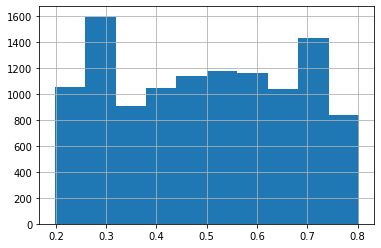

In [52]:
submission_df['Pred'].hist()

In [53]:
submission_df.to_csv('submission.csv', index=False)

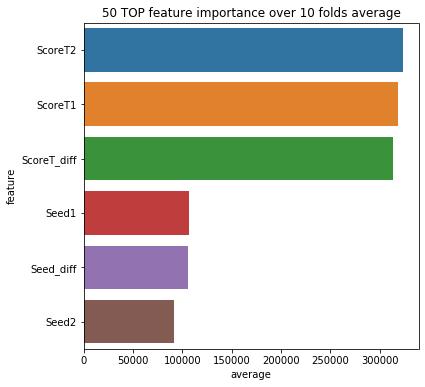

In [54]:
import seaborn as sns
feature_importances['average'] = feature_importances[[f'fold_{fold_n + 1}' for fold_n in range(folds.n_splits)]].mean(axis=1)
feature_importances.to_csv('feature_importances.csv')

plt.figure(figsize=(6, 6))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature');
plt.title('50 TOP feature importance over {} folds average'.format(folds.n_splits));